### MEMBACA DATA COVID DAN MELIHAT UKURAN DATA SET

In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

covid_url = "https://dqlab.id/data/covid19_worldwide_2020.json"
df_covid_worldwide = pd.read_json(covid_url)

print("Ukuran dataset: %d baris dan %d kolom.\n" % df_covid_worldwide.shape)
print("Lima data teratas:\n", df_covid_worldwide.head())
print("\nLima data terbawah:\n", df_covid_worldwide.tail())


Ukuran dataset: 61900 baris dan 6 kolom.

Lima data teratas:
         date  daily_confirmed_cases  daily_deaths  confirmed_cases  deaths  \
0 2020-03-20                      1             0                1       0   
1 2020-03-21                      0             0                1       0   
2 2020-03-22                      1             0                2       0   
3 2020-03-23                      0             0                2       0   
4 2020-03-24                      0             0                2       0   

  geo_id  
0     TD  
1     TD  
2     TD  
3     TD  
4     TD  

Lima data terbawah:
             date  daily_confirmed_cases  daily_deaths  confirmed_cases  \
61895 2020-02-24                     57             1              691   
61896 2020-02-26                      0             1              691   
61897 2020-03-10                     -9             1              696   
61898 2020-02-20                     79             2              621   
61899 2020-

### MELIHAT TIPE DATA SELURUH KOLOM

In [2]:
df_covid_worldwide.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61900 entries, 0 to 61899
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   61900 non-null  datetime64[ns]
 1   daily_confirmed_cases  61900 non-null  int64         
 2   daily_deaths           61900 non-null  int64         
 3   confirmed_cases        61900 non-null  int64         
 4   deaths                 61900 non-null  int64         
 5   geo_id                 61625 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 3.3+ MB


### MENGATUR TANGGAL SEBAGAI INDEX DAN MENGURUTKANNYA

In [3]:
df_covid_worldwide = df_covid_worldwide.set_index('date').sort_index()


In [4]:
print("\nInformasi data frame setelah set index kolom date:")
df_covid_worldwide.info()


Informasi data frame setelah set index kolom date:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 61900 entries, 2019-12-31 to 2020-12-14
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   daily_confirmed_cases  61900 non-null  int64 
 1   daily_deaths           61900 non-null  int64 
 2   confirmed_cases        61900 non-null  int64 
 3   deaths                 61900 non-null  int64 
 4   geo_id                 61625 non-null  object
dtypes: int64(4), object(1)
memory usage: 2.8+ MB


### MELIHAT MISSING VALUE PADA DATA

In [5]:
print("Jumlah missing value tiap kolom:")
print(df_covid_worldwide.isna().sum())


Jumlah missing value tiap kolom:
daily_confirmed_cases      0
daily_deaths               0
confirmed_cases            0
deaths                     0
geo_id                   275
dtype: int64


### MENGHAPUS MISSING VALUE

In [6]:
df_covid_worldwide.dropna(inplace=True)

print("\nJumlah missing value tiap kolom setelah didrop:")
print(df_covid_worldwide.isna().sum())


Jumlah missing value tiap kolom setelah didrop:
daily_confirmed_cases    0
daily_deaths             0
confirmed_cases          0
deaths                   0
geo_id                   0
dtype: int64


In [10]:
df_covid_worldwide.head()

,daily_confirmed_cases,daily_deaths,confirmed_cases,deaths,geo_id
date,,,,,
2019-12-31,0,0,0,0,IN
2019-12-31,0,0,0,0,IR
2019-12-31,0,0,0,0,PK
2019-12-31,0,0,0,0,AM
2019-12-31,27,0,27,0,CN


### MEMBUKA DATA COUNTRIES

In [11]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

countries_url = "https://dqlab.id/data/country_details.json"
df_countries = pd.read_json(countries_url)
df_countries.head()

,geo_id,country_name
0,TD,Chad
1,CU,Cuba
2,FJ,Fiji
3,GU,Guam
4,IR,Iran


### MENGGABUNGKAN KEDUA DATA DI ATAS 

In [14]:
df_covid_denormalized = pd.merge(df_covid_worldwide.reset_index(), df_countries, on="geo_id").set_index("date").sort_index()
df_covid_denormalized.head()

,daily_confirmed_cases,daily_deaths,confirmed_cases,deaths,geo_id,country_name
date,,,,,,
2019-12-31,0,0,0,0,IN,India
2019-12-31,0,0,0,0,SM,San_Marino
2019-12-31,0,0,0,0,IL,Israel
2019-12-31,0,0,0,0,FI,Finland
2019-12-31,0,0,0,0,QA,Qatar


Tambahkan satu kolom tambahan yaitu fatality_ratio, yang merupakan pembagian antara kolom deaths dan confirmed_cases.

In [15]:
df_covid_denormalized["fatality_ratio"] = df_covid_denormalized["deaths"]/df_covid_denormalized["confirmed_cases"]
df_covid_denormalized.head()

,daily_confirmed_cases,daily_deaths,confirmed_cases,deaths,geo_id,country_name,fatality_ratio
date,,,,,,,
2019-12-31,0,0,0,0,IN,India,NaN
2019-12-31,0,0,0,0,SM,San_Marino,NaN
2019-12-31,0,0,0,0,IL,Israel,NaN
2019-12-31,0,0,0,0,FI,Finland,NaN
2019-12-31,0,0,0,0,QA,Qatar,NaN


### NEGARA DENGAN FATALITY RATIO TERTINGGI TOP 20

In [16]:
df_top_20_fatality_rate = df_covid_denormalized.sort_values("fatality_ratio", ascending=False).head(20)

df_top_20_fatality_rate[["geo_id","country_name","fatality_ratio"]]

,geo_id,country_name,fatality_ratio
date,,,
2020-03-15,SD,Sudan,1.0
2020-02-20,IR,Iran,1.0
2020-03-18,SD,Sudan,1.0
2020-03-16,SD,Sudan,1.0
2020-03-17,SD,Sudan,1.0
2020-03-16,GT,Guatemala,1.0
2020-03-13,GY,Guyana,1.0
2020-03-24,GM,Gambia,0.5
2020-03-25,ZW,Zimbabwe,0.5


### KONDISI FATALITY RATIO TERTINGGI DI BULAN AGUSTUS 2020

In [23]:
df_covid_denormalized_august = df_covid_denormalized.loc["2020-08"].groupby("country_name").sum()

df_covid_denormalized_august["fatality_ratio"] = df_covid_denormalized_august["deaths"]/df_covid_denormalized_august["confirmed_cases"]

df_covid_denormalized_august.head()

,daily_confirmed_cases,daily_deaths,confirmed_cases,deaths,fatality_ratio
country_name,,,,,
Afghanistan,1620,131,1161878,41919,0.036079
Albania,4183,126,226041,6818,0.030163
Algeria,14315,301,1171031,42128,0.035975
Andorra,202,1,31133,1631,0.052388
Angola,1546,59,56404,2523,0.044731


### TOP 20 FATALITY RATIO

In [24]:
df_top_20_fatality_rate_on_august = df_covid_denormalized_august.sort_values(by="fatality_ratio", ascending=False).head(20)

df_top_20_fatality_rate_on_august["fatality_ratio"]

country_name
Yemen                     0.286473
Italy                     0.138619
France                    0.137979
United_Kingdom            0.130228
Belgium                   0.125079
Hungary                   0.122820
Netherlands               0.099309
Mexico                    0.099092
Jersey                    0.088677
Spain                     0.079746
Chad                      0.078870
Montserrat                0.076923
Canada                    0.073963
Sweden                    0.071475
Isle_of_Man               0.071429
British_Virgin_Islands    0.066239
Ireland                   0.065030
Sudan                     0.064250
Liberia                   0.063944
Ecuador                   0.061031
Name: fatality_ratio, dtype: float64

### VISUALISASI

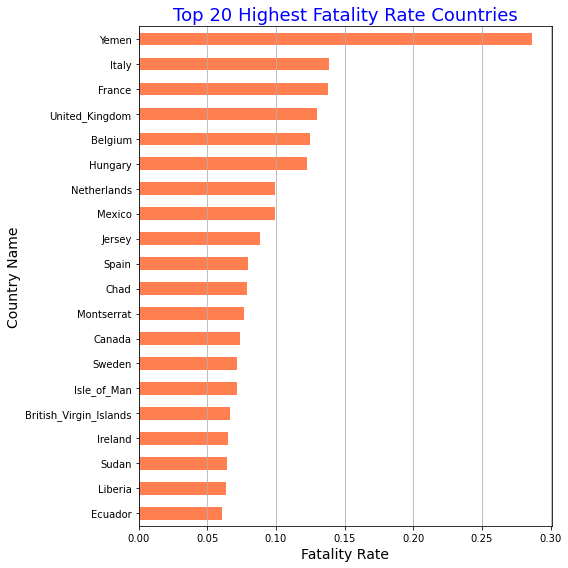

In [25]:
# Visulisasi
import matplotlib.pyplot as plt
plt.figure (figsize=(8,8))
df_top_20_fatality_rate_on_august["fatality_ratio"].sort_values().plot(kind="barh", color="coral")
plt.title("Top 20 Highest Fatality Rate Countries", fontsize=18, color="b")
plt.xlabel("Fatality Rate", fontsize=14)
plt.ylabel("Country Name", fontsize=14)
plt.grid(axis="x")
plt.tight_layout()
plt.show()